# World Happiness and Germany Happiness 6

### This script contains the following:
#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Line chart
#### 4. Time series analysis: decomposition
##### a. Happines Score Germany
##### b. Logged GDP per Capita Germany
##### c. Social Support Germany
##### d. Healthy Life Expectany Germany
##### e. Perception of corruption Germany
##### f. Generosity Germany
##### g. Freedom to make life choices
#### 5. Testing for stationarity
##### a. Happines Score Germany
##### b. Logged GDP per Capita Germany
##### c. Social Support Germany
##### d. Healthy Life Expectany Germany
##### e. Perception of corruption Germany
##### f. Generosity Germany
##### g. Freedom to make life choices
#### 6. Stationarizing the World Happiness Data
##### a. Happines Score Germany
##### b. Logged GDP per Capita Germany
##### c. Social Support Germany
##### d. Healthy Life Expectany Germany
##### e. Perception of corruption Germany
##### f. Generosity Germany
##### g. Freedom to make life choices
#### 7. Check autocorrelations after stationarizing
##### a. Happines Score Germany
##### b. Logged GDP per Capita Germany
##### c. Social Support Germany
##### d. Healthy Life Expectany Germany
##### e. Perception of corruption Germany
##### f. Generosity Germany
##### g. Freedom to make life choices

#### 1. Importing your libraries and data

In [5]:
from fredapi import Fred
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html


In [6]:
# Shortcutpath
path=r'/Users/yevgeniyaem/Documents/Weiterbildung Data Analytics/Achievement 6/'
path

'/Users/yevgeniyaem/Documents/Weiterbildung Data Analytics/Achievement 6/'

In [7]:
# Import cleaned data set
whr= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_report.csv'), index_col = False)

In [8]:
whr.shape

(1233, 12)

In [9]:
dups = whr.duplicated()
dups.sum()

0

In [10]:
whr.head()

,Unnamed: 0,country,region,happiness_rank,happiness_score,social_support,healthy_life_expectancy,freedom_to_make_life_choices,perceptions_of_corruption,generosity,logged_gdp_per_capita,year
0,132,Afghanistan,Southern Asia,135.0,3.575,0.30285,23.442888,0.23414,0.09719,0.36510,5.770880,2015
1,82,Albania,Central and Eastern Europe,83.0,4.959,0.80434,62.847960,0.35733,0.06413,0.14272,6.779547,2015
2,59,Algeria,Middle East and Northern Africa,60.0,5.605,1.07772,47.732765,0.28579,0.17383,0.07822,6.846188,2015
3,27,Argentina,Latin America and Caribbean,28.0,6.574,1.24823,60.837134,0.44974,0.08484,0.11451,6.960831,2015
4,109,Armenia,Central and Eastern Europe,112.0,4.350,0.77711,56.406672,0.19847,0.03900,0.07855,6.645364,2015


In [11]:
type(whr)

pandas.core.frame.DataFrame

In [12]:
whr.columns

Index(['Unnamed: 0', 'country', 'region', 'happiness_rank', 'happiness_score',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'perceptions_of_corruption',
       'generosity', 'logged_gdp_per_capita', 'year'],
      dtype='object')

#### 2. Subsetting, wrangling, and cleaning time-series data
##### Logic for selecting data points:
- Filter for relevant years (2015-2023) to maintain consistency.
- Focus on Germany and global trends separately.
- Remove unnecessary columns like ‘happiness_rank’ (since ranking is relative and may not be meaningful in a time series).
- Ensure there are no missing values or duplicates.

In [14]:
# Create subset
# Select relevant columns
whr_ts = whr[['year', 'country', 'happiness_score', 'logged_gdp_per_capita',
              'social_support', 'healthy_life_expectancy',
              'freedom_to_make_life_choices', 'perceptions_of_corruption', 'generosity']]

# Filter for Germany only
whr_germany = whr_ts[whr_ts['country'] == 'Germany'].drop(columns=['country'])

In [15]:
# Convert 'year' to proper datetime format
whr_germany['datetime'] = pd.to_datetime(whr_germany['year'], format='%Y')  # Ensuring correct format

# Set 'datetime' as index
whr_germany = whr_germany.set_index('datetime')

# Drop the 'year' column
whr_germany.drop(columns=['year'], inplace=True)

# Display first rows to check
print(whr_germany.head(1))
print(whr_germany.shape)

            happiness_score  logged_gdp_per_capita  social_support  \
datetime                                                             
2015-01-01             6.75               7.192122         1.29937   

            healthy_life_expectancy  freedom_to_make_life_choices  \
datetime                                                            
2015-01-01                68.922941                       0.61477   

            perceptions_of_corruption  generosity  
datetime                                           
2015-01-01                    0.21843     0.28214  
(9, 7)


In [16]:
# Check for missing values Germany subset
whr_germany.isnull().sum() # no missing values

happiness_score                 0
logged_gdp_per_capita           0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
perceptions_of_corruption       0
generosity                      0
dtype: int64

In [17]:
# Check the data
whr_germany.sample(9)

,happiness_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,perceptions_of_corruption,generosity
datetime,,,,,,,
2019-01-01,6.9650,7.201171,1.474000,66.538080,0.586000,0.280000,0.273000
2016-01-01,6.9940,7.278539,1.097740,62.973154,0.534660,0.285510,0.304520
2021-01-01,7.1550,10.873000,0.903000,72.500000,0.875000,0.460000,0.011000
2018-01-01,6.9650,7.201171,1.474000,66.538080,0.586000,0.280000,0.273000
2017-01-01,6.9510,7.305809,1.472520,61.742913,0.562511,0.276732,0.336269
2015-01-01,6.7500,7.192122,1.299370,68.922941,0.614770,0.218430,0.282140
2022-01-01,7.0340,8.612166,0.453333,31.040000,0.531818,0.000000,0.271667
2023-01-01,6.8920,10.879000,0.896000,71.300000,0.846000,0.420000,0.030000
2020-01-01,7.0758,10.732819,0.898874,72.202019,0.867371,0.456422,0.080179


In [18]:
# Check for duplicates Germany subset
dups_g = whr_germany.duplicated()
dups_g.sum()

1

##### Since the data subset for Germany contains only 9 rows, i visually checked each row, there are no dulpicates. No further cleaning steps neccesary.

#### 3. Line chart

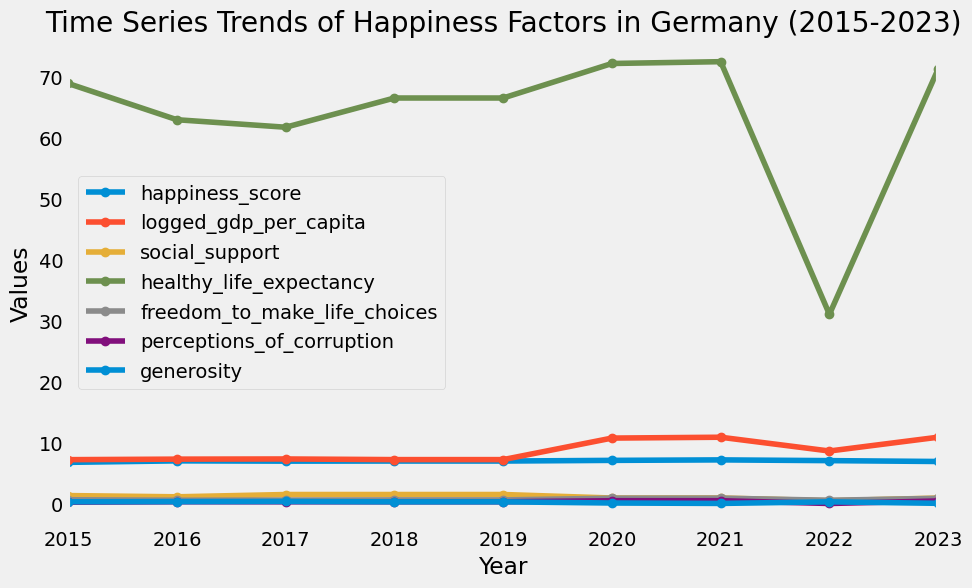

In [21]:
# Create a line chart for Germany
import matplotlib.pyplot as plt

whr_germany.plot(figsize=(10,6), marker='o')
plt.title("Time Series Trends of Happiness Factors in Germany (2015-2023)")
plt.xlabel("Year")
plt.ylabel("Values")
plt.legend(loc="best")
plt.grid()

# Save plot
plt.savefig(os.path.join(path, "04 Analysis", "Visualizations", "germany_time_series.png"), dpi=300, bbox_inches='tight')
plt.show()


#### 4. Time series analysis: decomposition
##### a. Happines Score Germany

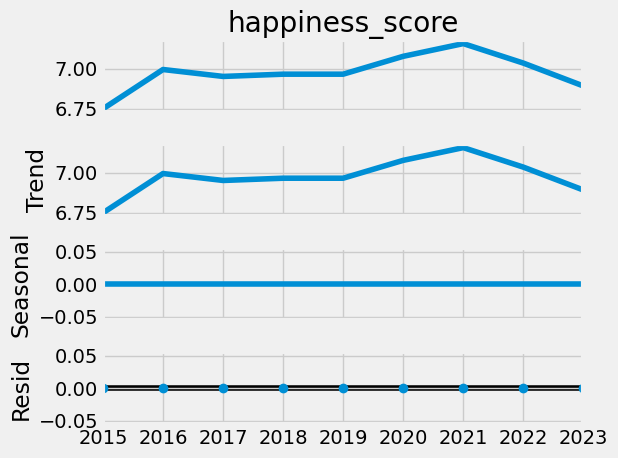

In [23]:
# Decompose the Time Series Germany, Happiness Score

from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(whr_germany['happiness_score'], model='additive', period=1)
decomposition.plot()


# Save plot
plt.savefig(os.path.join(path, "04 Analysis", "Visualizations", "germany_decomposition.png"), dpi=300, bbox_inches='tight')
plt.show()



##### b. Logged GDP per Capita Germany

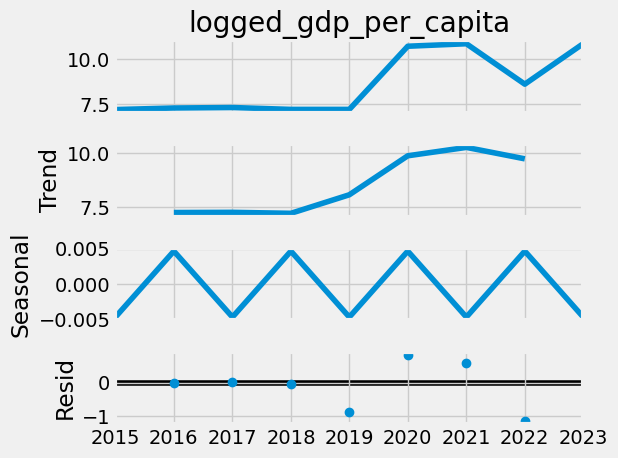

In [146]:
# Decompose the Time Series Germany, Logged GDP per Capita

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(whr_germany['logged_gdp_per_capita'], model='additive', period=2)
decomposition.plot()

# Save plot
plt.savefig(os.path.join(path, "04 Analysis", "Visualizations", "germany_gdp_ts.png"), dpi=300, bbox_inches='tight')
plt.show()



##### c. Social Support Germany

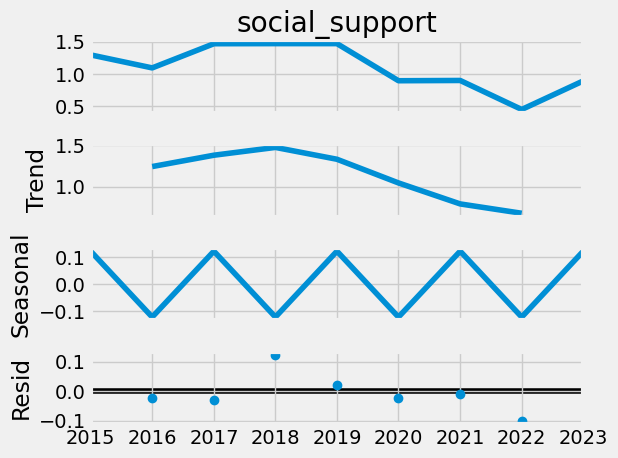

In [148]:
# Decompose the Time Series Germany, Social Support

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(whr_germany['social_support'], model='additive', period=2)
decomposition.plot()

# Save plot
plt.savefig(os.path.join(path, "04 Analysis", "Visualizations", "germany_social_suport_ts.png"), dpi=300, bbox_inches='tight')
plt.show()



##### d. Healthy Life Expectany Germany

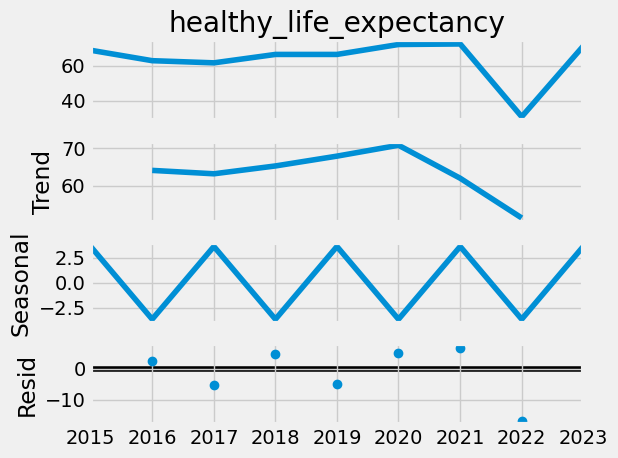

In [150]:
# Decompose the Time Series Germany, Healthy Life Expectany

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(whr_germany['healthy_life_expectancy'], model='additive', period=2)
decomposition.plot()

# Save plot
plt.savefig(os.path.join(path, "04 Analysis", "Visualizations", "germany_hle_ts.png"), dpi=300, bbox_inches='tight')
plt.show()



##### e. Perception of corruption Germany

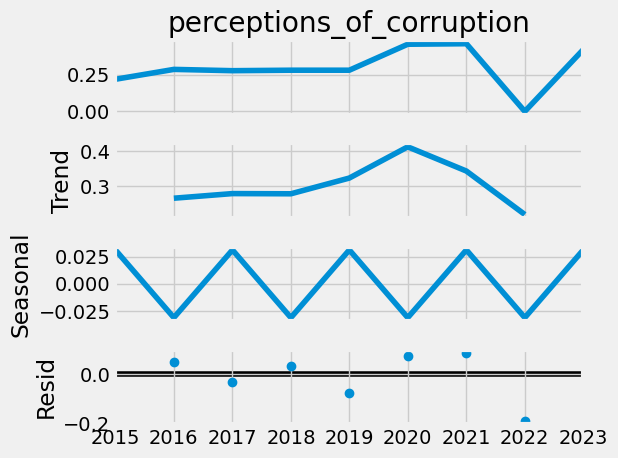

In [152]:
# Decompose the Time Series Germany, Perception of corruption

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(whr_germany['perceptions_of_corruption'], model='additive', period=2)
decomposition.plot()

# Save plot
plt.savefig(os.path.join(path, "04 Analysis", "Visualizations", "germany_corruption_ts.png"), dpi=300, bbox_inches='tight')
plt.show()

##### f. Generosity Germany

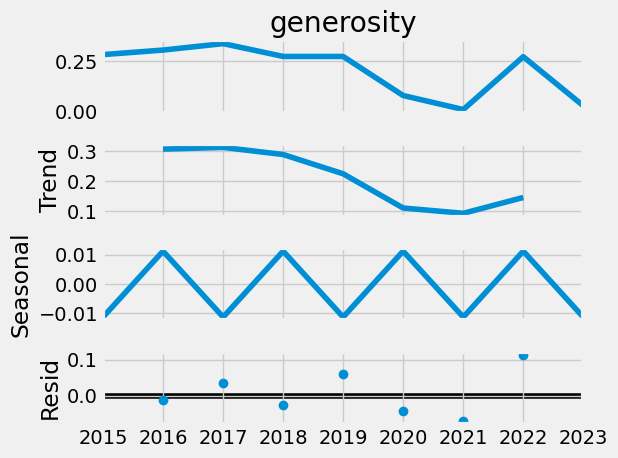

In [154]:
# Decompose the Time Series Germany, Generosity

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(whr_germany['generosity'], model='additive', period=2)
decomposition.plot()

# Save plot
plt.savefig(os.path.join(path, "04 Analysis", "Visualizations", "germany_generosity_ts.png"), dpi=300, bbox_inches='tight')
plt.show()


##### g. Freedom to make life choices Germany

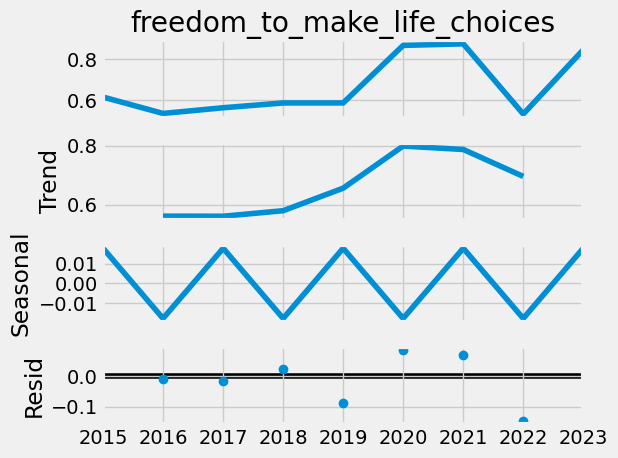

In [156]:
# Decompose the Time Series Germany, Generosity

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(whr_germany['freedom_to_make_life_choices'], model='additive', period=2)
decomposition.plot()

# Save plot
plt.savefig(os.path.join(path, "04 Analysis", "Visualizations", "germany_freedom_ts.png"), dpi=300, bbox_inches='tight')
plt.show()


#### 5. Testing for stationarity
##### a. Happines Score Germany

In [37]:
# Dickey-Fuller Test Happines Score Germany
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(whr_germany['happiness_score'])


Dickey-Fuller Stationarity test:
Test Statistic                -1.206772
p-value                        0.670676
Number of Lags Used            1.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


#### p-value > 0.05: Fail to reject H₀ (data is non-stationary).

##### b. Logged GDP per Capita Germany

In [40]:
# Dickey-Fuller Test Logged GDP per Capita Germany
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(whr_germany['logged_gdp_per_capita'])


Dickey-Fuller Stationarity test:
Test Statistic                -1.204759
p-value                        0.671545
Number of Lags Used            0.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


#### p-value > 0.05: Fail to reject H₀ (data is non-stationary).

##### c. Social Support Germany

In [43]:
# Dickey-Fuller Test Social Support Germany
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(whr_germany['social_support'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.982939
p-value                        0.294103
Number of Lags Used            2.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


#### p-value > 0.05: Fail to reject H₀ (data is non-stationary).

##### d. Healthy Life Expectany Germany

In [46]:
# Dickey-Fuller Test Healthy Life Expectany Germany
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(whr_germany['healthy_life_expectancy'])

Dickey-Fuller Stationarity test:
Test Statistic                -2.751858
p-value                        0.065486
Number of Lags Used            1.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


#### p-value > 0.05: Fail to reject H₀ (data is non-stationary).

##### e. Perception of corruption Germany

In [49]:
# Dickey-Fuller Test Perception of corruption Germany
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(whr_germany['perceptions_of_corruption'])

Dickey-Fuller Stationarity test:
Test Statistic                -0.588473
p-value                        0.873565
Number of Lags Used            2.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


#### p-value > 0.05: Fail to reject H₀ (data is non-stationary).

##### f. Generosity Germany

In [52]:
# Dickey-Fuller Test Generosity Germany
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(whr_germany['generosity'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.591336
p-value                        0.487944
Number of Lags Used            0.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


#### p-value > 0.05: Fail to reject H₀ (data is non-stationary).

##### g. Freedom to make life choices Germany

In [55]:
# Dickey-Fuller Test Freedom to make life choices Germany
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(whr_germany['freedom_to_make_life_choices'])

Dickey-Fuller Stationarity test:
Test Statistic                -2.054569
p-value                        0.263170
Number of Lags Used            0.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


#### p-value > 0.05: Fail to reject H₀ (data is non-stationary).

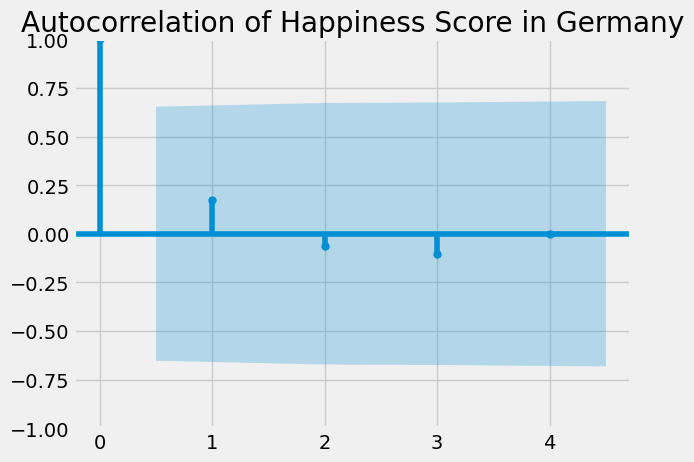

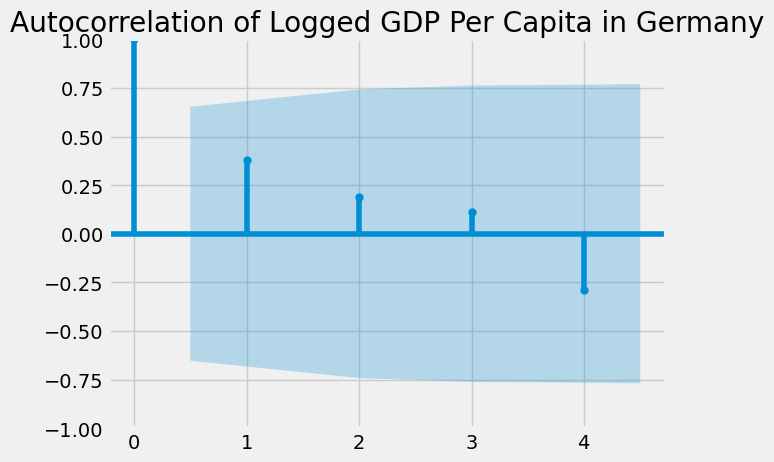

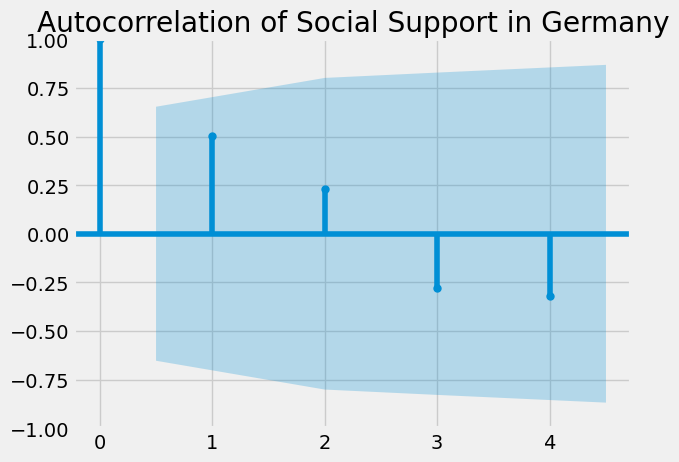

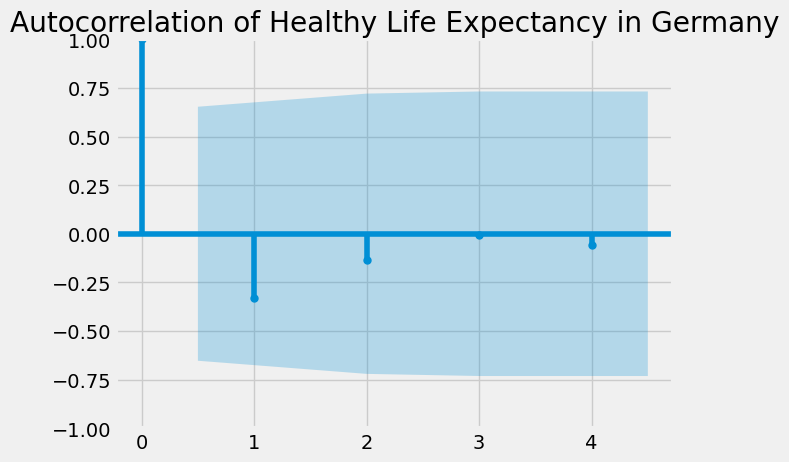

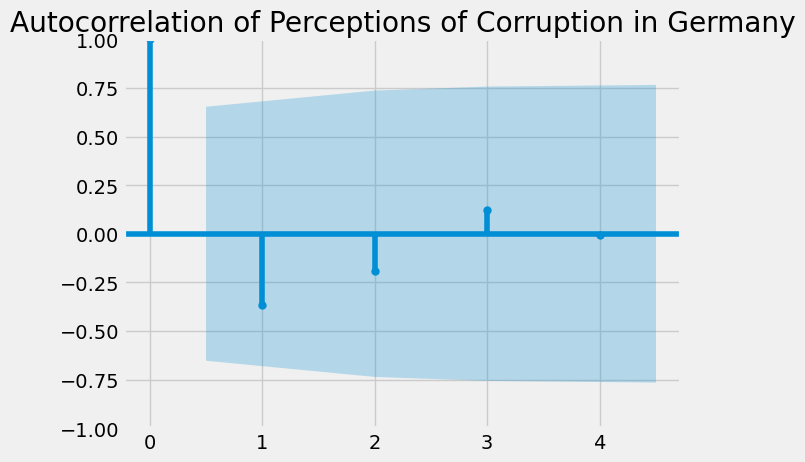

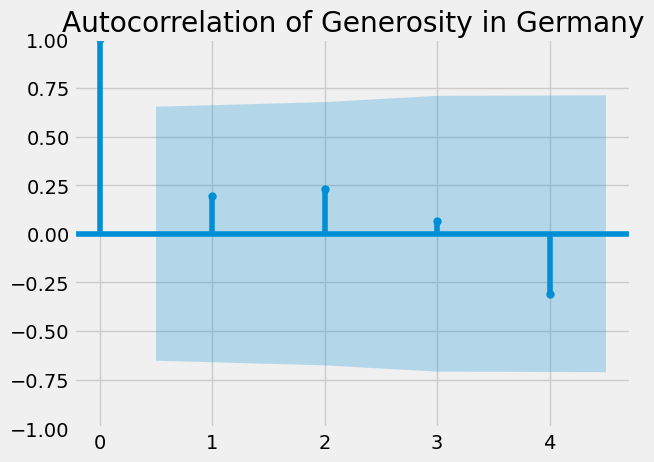

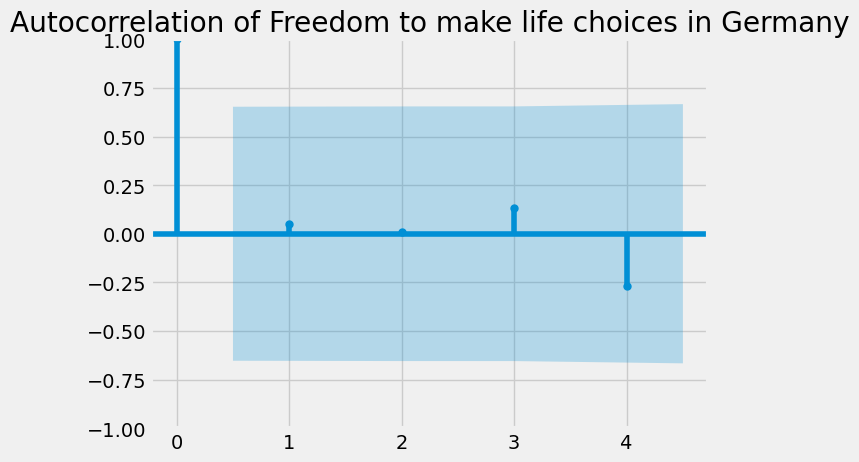

In [57]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Select a single numeric column for autocorrelation 
plot_acf(whr_germany['happiness_score'])
plt.title("Autocorrelation of Happiness Score in Germany")
plt.show()

# Select a single numeric column for autocorrelation 
plot_acf(whr_germany['logged_gdp_per_capita'])
plt.title("Autocorrelation of Logged GDP Per Capita in Germany")
plt.show()

# Select a single numeric column for autocorrelation 
plot_acf(whr_germany['social_support'])
plt.title("Autocorrelation of Social Support in Germany")
plt.show()

# Select a single numeric column for autocorrelation 
plot_acf(whr_germany['healthy_life_expectancy'])
plt.title("Autocorrelation of Healthy Life Expectancy in Germany")
plt.show()

# Select a single numeric column for autocorrelation 
plot_acf(whr_germany['perceptions_of_corruption'])
plt.title("Autocorrelation of Perceptions of Corruption in Germany")
plt.show()

# Select a single numeric column for autocorrelation 
plot_acf(whr_germany['generosity'])
plt.title("Autocorrelation of Generosity in Germany")
plt.show()

# Select a single numeric column for autocorrelation 
plot_acf(whr_germany['freedom_to_make_life_choices'])
plt.title("Autocorrelation of Freedom to make life choices in Germany")
plt.show()

#### 6. Stationarizing the World Happiness Data
##### a. Happines Score Germany

In [59]:
from statsmodels.tsa.stattools import adfuller

# First differencing
whr_germany['happiness_diff'] = whr_germany['happiness_score'].diff()

# Perform ADF test on the differenced data
result_diff = adfuller(whr_germany['happiness_diff'].dropna())

# Print results in the correct format
print("Dickey-Fuller Stationarity test:")
df_output = pd.Series(result_diff[:4], index=["Test Statistic", "p-value", "Number of Lags Used", "Number of Observations Used"])
for key, value in result_diff[4].items():
    df_output[f"Critical Value ({key})"] = value

print(df_output)


Dickey-Fuller Stationarity test:
Test Statistic                -22.711473
p-value                         0.000000
Number of Lags Used             2.000000
Number of Observations Used     5.000000
Critical Value (1%)            -6.045114
Critical Value (5%)            -3.929280
Critical Value (10%)           -2.986810
dtype: float64


##### p-value < 0.05: Reject H₀ (data is stationary).

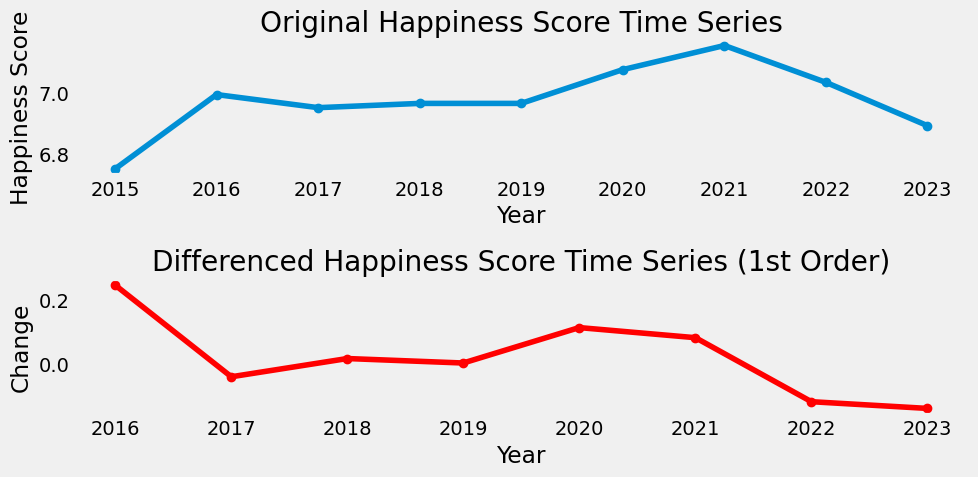

In [61]:
import matplotlib.pyplot as plt

# Plot original happiness score
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)  # Create a subplot with 2 rows, 1 column
plt.plot(whr_germany.index, whr_germany['happiness_score'], marker='o', linestyle='-')
plt.title("Original Happiness Score Time Series")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.grid()

# Plot differenced series
plt.subplot(2,1,2)
plt.plot(whr_germany.index, whr_germany['happiness_diff'], marker='o', linestyle='-', color='red')
plt.title("Differenced Happiness Score Time Series (1st Order)")
plt.xlabel("Year")
plt.ylabel("Change")
plt.grid()

# Adjust layout and show plots
plt.tight_layout()
plt.show()

##### b. Logged GDP per Capita Germany

In [63]:
from statsmodels.tsa.stattools import adfuller

# First differencing
whr_germany['logged_gdp_per_capita_diff'] = whr_germany['logged_gdp_per_capita'].diff()

# Perform ADF test on the differenced data
result_diff = adfuller(whr_germany['logged_gdp_per_capita_diff'].dropna())

# Print results in the correct format
print("Dickey-Fuller Stationarity test:")
df_output = pd.Series(result_diff[:4], index=["Test Statistic", "p-value", "Number of Lags Used", "Number of Observations Used"])
for key, value in result_diff[4].items():
    df_output[f"Critical Value ({key})"] = value

print(df_output)

Dickey-Fuller Stationarity test:
Test Statistic                -3.617880
p-value                        0.005428
Number of Lags Used            1.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


##### p-value < 0.05: Reject H₀ (data is stationary).

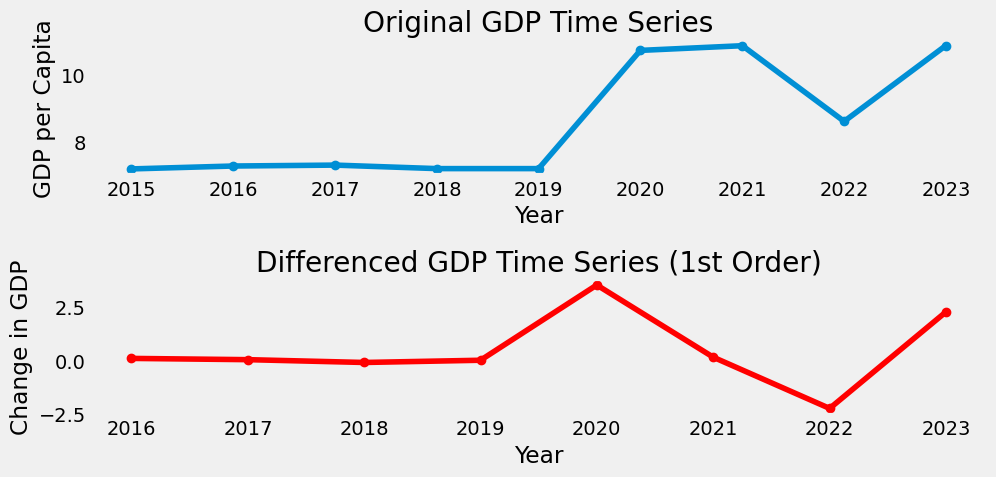

In [65]:
# Plot original happiness score
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)  # Create a subplot with 2 rows, 1 column
plt.plot(whr_germany.index, whr_germany['logged_gdp_per_capita'], marker='o', linestyle='-')
plt.title("Original GDP Time Series")
plt.xlabel("Year")
plt.ylabel("GDP per Capita")
plt.grid()


# Plot differenced series
plt.subplot(2,1,2)
plt.plot(whr_germany.index, whr_germany['logged_gdp_per_capita_diff'], marker='o', linestyle='-', color='red')
plt.title("Differenced GDP Time Series (1st Order)")
plt.xlabel("Year")
plt.ylabel("Change in GDP")
plt.grid()

# Adjust layout and show plots
plt.tight_layout()
plt.show()


##### c. Social Support Germany

In [67]:
# First differencing
whr_germany['social_support_diff'] = whr_germany['social_support'].diff()

# Perform ADF test on the differenced data
result_diff = adfuller(whr_germany['social_support_diff'].dropna())

# Print results in the correct format
print("Dickey-Fuller Stationarity test:")
df_output = pd.Series(result_diff[:4], index=["Test Statistic", "p-value", "Number of Lags Used", "Number of Observations Used"])
for key, value in result_diff[4].items():
    df_output[f"Critical Value ({key})"] = value

print(df_output)

Dickey-Fuller Stationarity test:
Test Statistic                -42.972092
p-value                         0.000000
Number of Lags Used             2.000000
Number of Observations Used     5.000000
Critical Value (1%)            -6.045114
Critical Value (5%)            -3.929280
Critical Value (10%)           -2.986810
dtype: float64


##### p-value < 0.05: Reject H₀ (data is stationary).

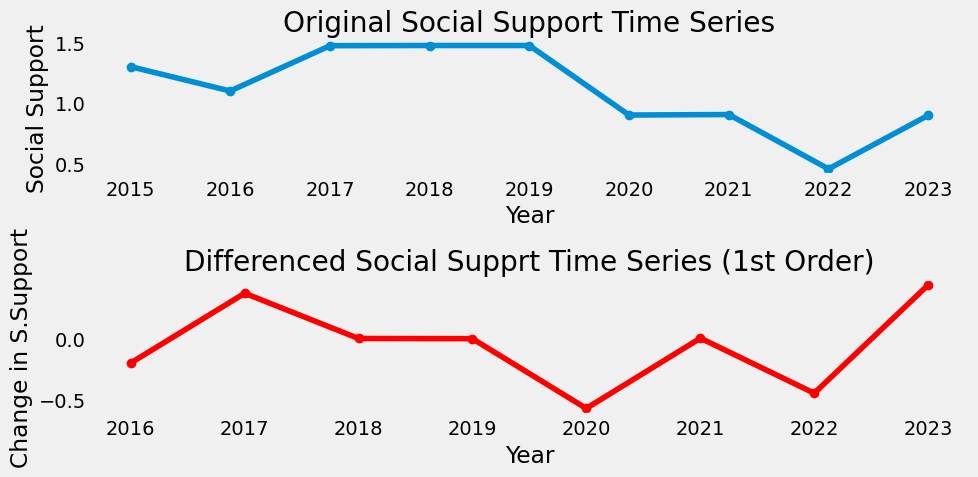

In [71]:
# Data are weak stationary, another methods will give same result bc data set is small.
# Plot original social support score
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)  # Create a subplot with 2 rows, 1 column
plt.plot(whr_germany.index, whr_germany['social_support'], marker='o', linestyle='-')
plt.title("Original Social Support Time Series")
plt.xlabel("Year")
plt.ylabel("Social Support")
plt.grid()


# Plot differenced series
plt.subplot(2,1,2)
plt.plot(whr_germany.index, whr_germany['social_support_diff'], marker='o', linestyle='-', color='red')
plt.title("Differenced Social Supprt Time Series (1st Order)")
plt.xlabel("Year")
plt.ylabel("Change in S.Support")
plt.grid()

# Adjust layout and show plots
plt.tight_layout()
plt.show()


##### d. Healthy Life Expectany Germany

In [73]:
# First differencing
whr_germany['healthy_life_expectancy_diff'] = whr_germany['healthy_life_expectancy'].diff()

# Perform ADF test on the differenced data
result_diff = adfuller(whr_germany['healthy_life_expectancy_diff'].dropna())

# Print results in the correct format
print("Dickey-Fuller Stationarity test:")
df_output = pd.Series(result_diff[:4], index=["Test Statistic", "p-value", "Number of Lags Used", "Number of Observations Used"])
for key, value in result_diff[4].items():
    df_output[f"Critical Value ({key})"] = value

print(df_output)

Dickey-Fuller Stationarity test:
Test Statistic                -2.084845
p-value                        0.250652
Number of Lags Used            1.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


##### Instead of improving, the p-value increased after differencing, making the series even less stationary.


In [75]:
# Before dif log
whr_germany['healthy_life_expectancy_log'] = np.log(whr_germany['healthy_life_expectancy'])  

# ADF Test
result_log = adfuller(whr_germany['healthy_life_expectancy_log'].dropna())
print("Dickey-Fuller Test after Log Transformation:")
print(pd.Series(result_log[:4], index=["Test Statistic", "p-value", "Number of Lags Used", "Number of Observations Used"]))
for key, value in result_log[4].items():
    print(f"Critical Value ({key}): {value}")


Dickey-Fuller Test after Log Transformation:
Test Statistic                -2.621920
p-value                        0.088551
Number of Lags Used            1.000000
Number of Observations Used    7.000000
dtype: float64
Critical Value (1%): -4.9386902332361515
Critical Value (5%): -3.477582857142857
Critical Value (10%): -2.8438679591836733


In [76]:
# Remove the Trend Using a Hodrick-Prescott (HP) Filter
from statsmodels.tsa.filters.hp_filter import hpfilter

cycle, trend = hpfilter(whr_germany['healthy_life_expectancy'], lamb=10)  # Use a small lambda for short time series
whr_germany['healthy_life_expectancy_hp_detrended'] = cycle  # This removes the trend, keeping short-term fluctuations

# ADF Test
result_hp = adfuller(whr_germany['healthy_life_expectancy_hp_detrended'].dropna())
print("Dickey-Fuller Test after HP Filter:")
print(pd.Series(result_hp[:4], index=["Test Statistic", "p-value", "Number of Lags Used", "Number of Observations Used"]))
for key, value in result_hp[4].items():
    print(f"Critical Value ({key}): {value}")



Dickey-Fuller Test after HP Filter:
Test Statistic                -2.471309
p-value                        0.122612
Number of Lags Used            1.000000
Number of Observations Used    7.000000
dtype: float64
Critical Value (1%): -4.9386902332361515
Critical Value (5%): -3.477582857142857
Critical Value (10%): -2.8438679591836733


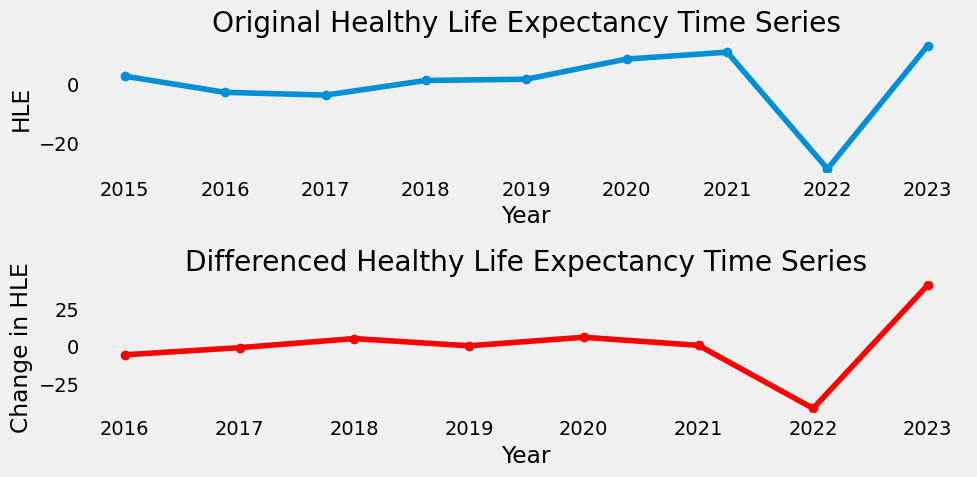

In [77]:
# Accept "Weak Stationarity" and Proceed bc of the size of germany data subset and plot the data
# Plot HLE score
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)  # Create a subplot with 2 rows, 1 column
plt.plot(whr_germany.index, whr_germany['healthy_life_expectancy_hp_detrended'], marker='o', linestyle='-')
plt.title("Original Healthy Life Expectancy Time Series")
plt.xlabel("Year")
plt.ylabel("HLE")
plt.grid()


# Plot differenced series
plt.subplot(2,1,2)
plt.plot(whr_germany.index, whr_germany['healthy_life_expectancy_diff'], marker='o', linestyle='-', color='red')
plt.title("Differenced Healthy Life Expectancy Time Series")
plt.xlabel("Year")
plt.ylabel("Change in HLE")
plt.grid()

# Adjust layout and show plots
plt.tight_layout()
plt.show()



##### e. Perception of corruption Germany


In [79]:
# First differencing
whr_germany['perceptions_of_corruption_diff'] = whr_germany['perceptions_of_corruption'].diff()

# Perform ADF test on the differenced data
result_diff = adfuller(whr_germany['perceptions_of_corruption_diff'].dropna())

# Print results in the correct format
print("Dickey-Fuller Stationarity test:")
df_output = pd.Series(result_diff[:4], index=["Test Statistic", "p-value", "Number of Lags Used", "Number of Observations Used"])
for key, value in result_diff[4].items():
    df_output[f"Critical Value ({key})"] = value

print(df_output)

Dickey-Fuller Stationarity test:
Test Statistic                -3.155479
p-value                        0.022711
Number of Lags Used            2.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


#### p-value < 0,05 strong stationarity.
##### Test statistic = -3.155479 → Below the 1% critical value (-6.045114).

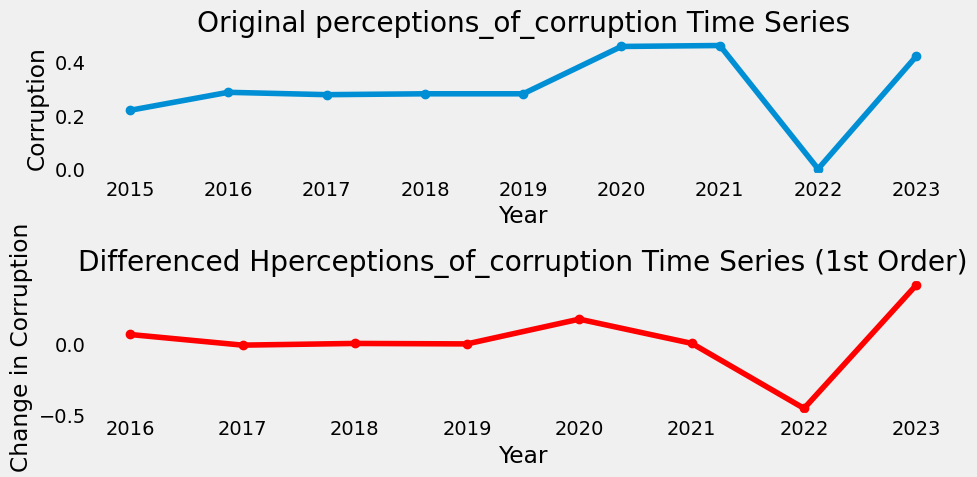

In [81]:
# Plot perceptions of corruption score
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)  # Create a subplot with 2 rows, 1 column
plt.plot(whr_germany.index, whr_germany['perceptions_of_corruption'], marker='o', linestyle='-')
plt.title("Original perceptions_of_corruption Time Series")
plt.xlabel("Year")
plt.ylabel("Corruption")
plt.grid()


# Plot differenced series
plt.subplot(2,1,2)
plt.plot(whr_germany.index, whr_germany['perceptions_of_corruption_diff'], marker='o', linestyle='-', color='red')
plt.title("Differenced Hperceptions_of_corruption Time Series (1st Order)")
plt.xlabel("Year")
plt.ylabel("Change in Corruption")
plt.grid()

# Adjust layout and show plots
plt.tight_layout()
plt.show()


##### f. Generosity Germany

In [83]:
# First differencing
whr_germany['generosity_diff'] = whr_germany['generosity'].diff()

# Perform ADF test on the differenced data
result_diff = adfuller(whr_germany['generosity_diff'].dropna())

# Print results in the correct format
print("Dickey-Fuller Stationarity test:")
df_output = pd.Series(result_diff[:4], index=["Test Statistic", "p-value", "Number of Lags Used", "Number of Observations Used"])
for key, value in result_diff[4].items():
    df_output[f"Critical Value ({key})"] = value

print(df_output)

Dickey-Fuller Stationarity test:
Test Statistic                -3.089616
p-value                        0.027331
Number of Lags Used            1.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


##### p-value < 0.05: Reject H₀ (data is stationary).

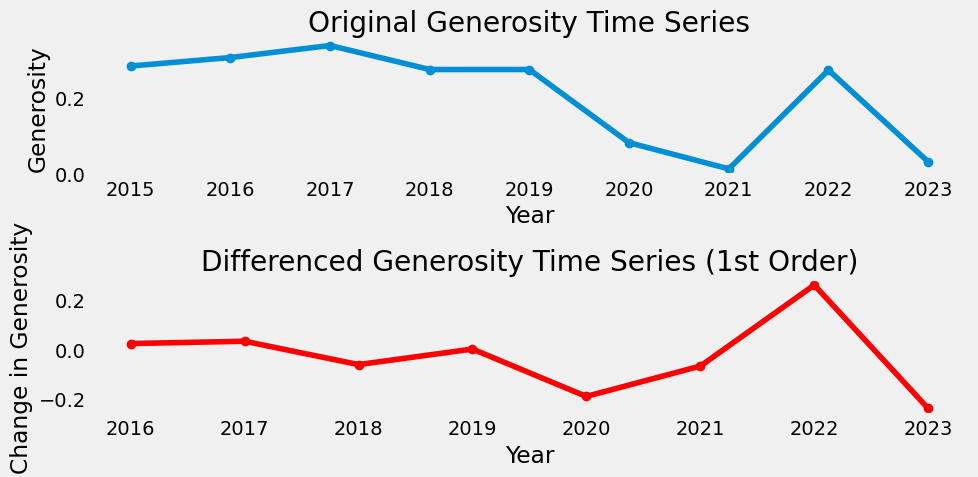

In [85]:
# Plot original Generosity
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)  # Create a subplot with 2 rows, 1 column
plt.plot(whr_germany.index, whr_germany['generosity'], marker='o', linestyle='-')
plt.title("Original Generosity Time Series")
plt.xlabel("Year")
plt.ylabel("Generosity")
plt.grid()


# Plot differenced series
plt.subplot(2,1,2)
plt.plot(whr_germany.index, whr_germany['generosity_diff'], marker='o', linestyle='-', color='red')
plt.title("Differenced Generosity Time Series (1st Order)")
plt.xlabel("Year")
plt.ylabel("Change in Generosity")
plt.grid()

# Adjust layout and show plots
plt.tight_layout()
plt.show()



##### g. Freedom to make life choices

In [87]:
# First differencing
whr_germany['freedom_to_make_life_choices_diff'] = whr_germany['freedom_to_make_life_choices'].diff()

# Perform ADF test on the differenced data
result_diff = adfuller(whr_germany['freedom_to_make_life_choices_diff'].dropna())

# Print results in the correct format
print("Dickey-Fuller Stationarity test:")
df_output = pd.Series(result_diff[:4], index=["Test Statistic", "p-value", "Number of Lags Used", "Number of Observations Used"])
for key, value in result_diff[4].items():
    df_output[f"Critical Value ({key})"] = value

print(df_output)

Dickey-Fuller Stationarity test:
Test Statistic                -4.022522
p-value                        0.001297
Number of Lags Used            1.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


##### p-value < 0.05: Reject H₀ (data is stationary).

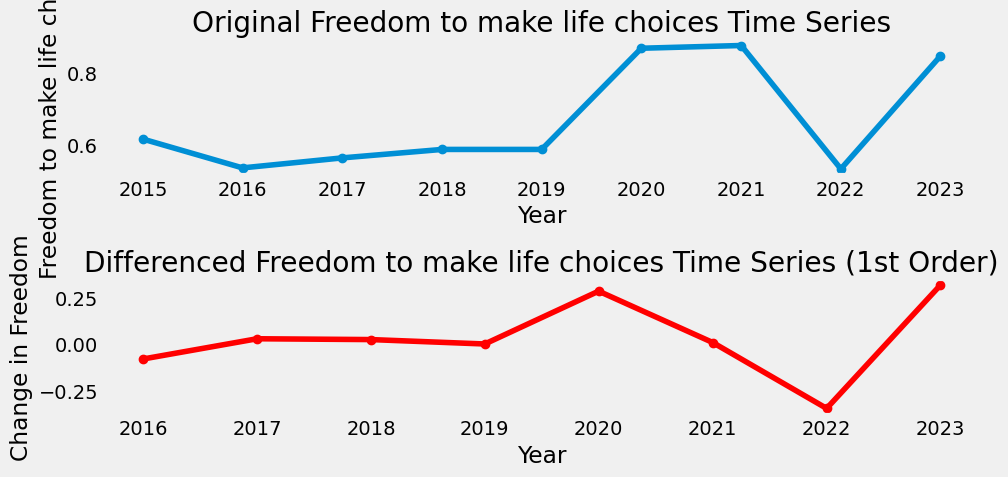

In [89]:
# Plot original Freedom to make life choices
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)  # Create a subplot with 2 rows, 1 column
plt.plot(whr_germany.index, whr_germany['freedom_to_make_life_choices'], marker='o', linestyle='-')
plt.title("Original Freedom to make life choices Time Series")
plt.xlabel("Year")
plt.ylabel("Freedom to make life choices")
plt.grid()


# Plot differenced series
plt.subplot(2,1,2)
plt.plot(whr_germany.index, whr_germany['freedom_to_make_life_choices_diff'], marker='o', linestyle='-', color='red')
plt.title("Differenced Freedom to make life choices Time Series (1st Order)")
plt.xlabel("Year")
plt.ylabel("Change in Freedom")
plt.grid()

# Adjust layout and show plots
plt.tight_layout()
plt.show()



#### Check autocorrelations after stationarizing

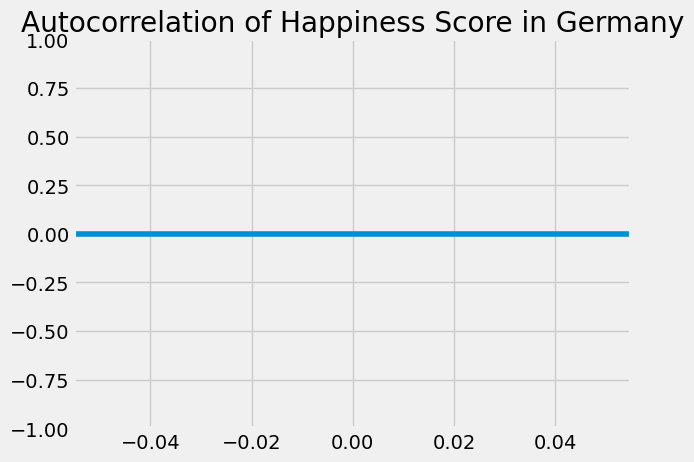

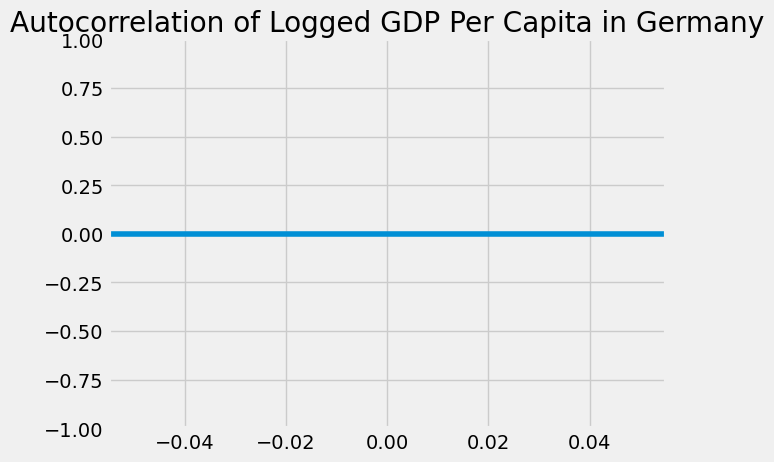

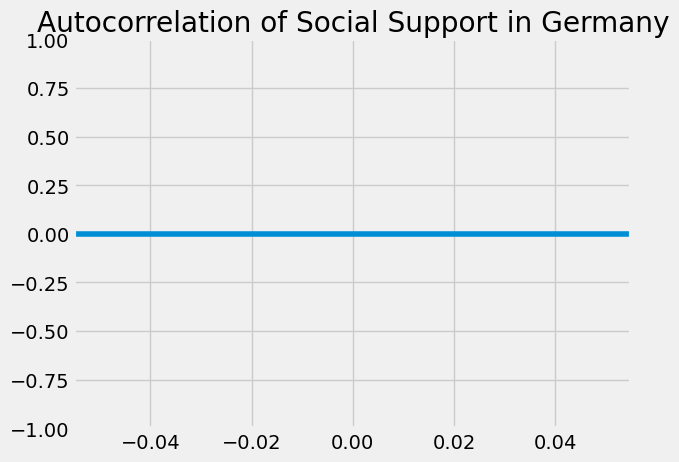

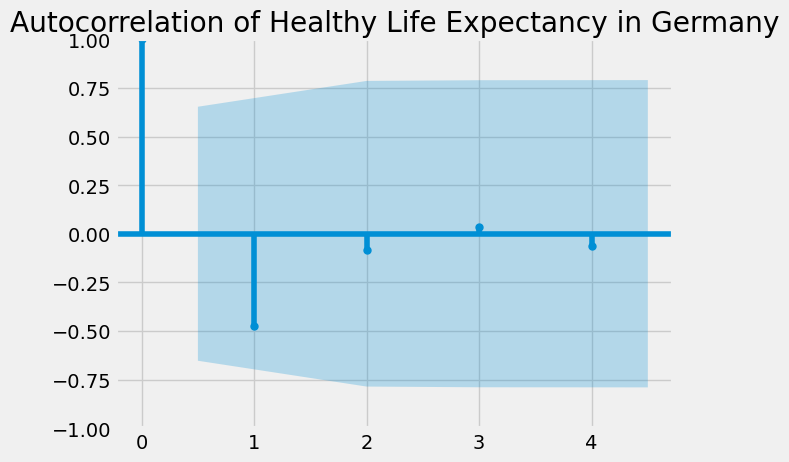

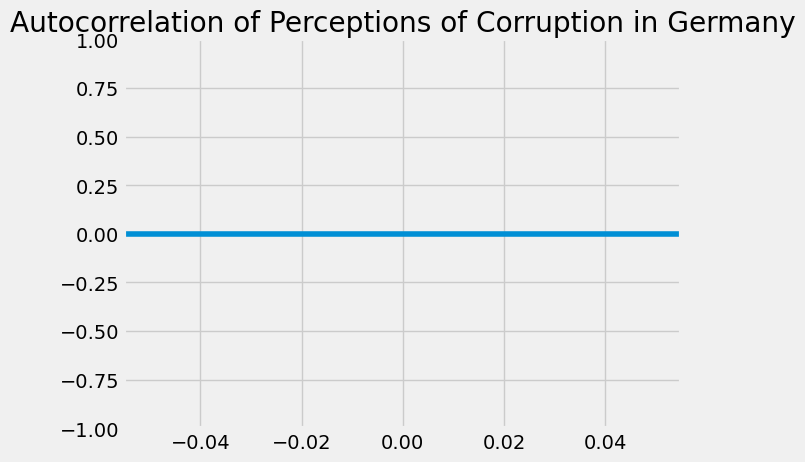

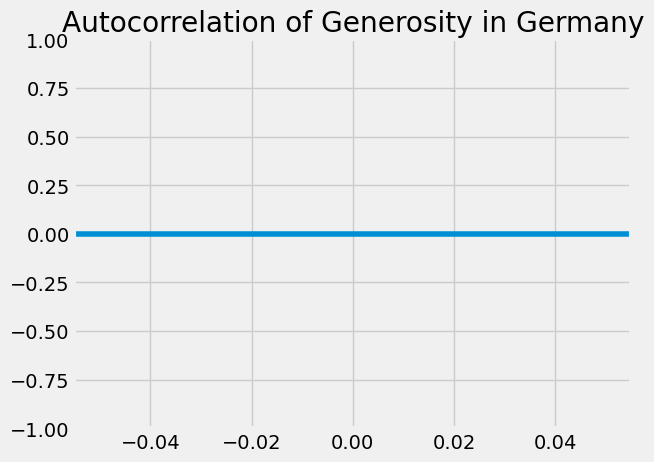

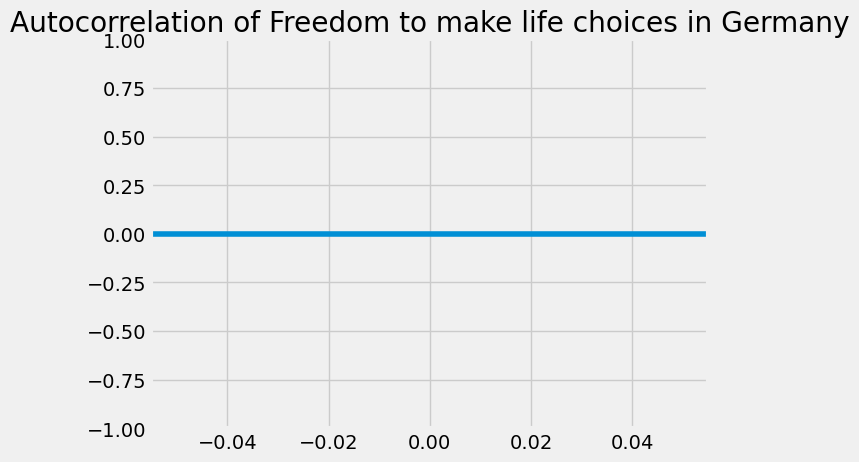

In [91]:
# Check out a plot of autocorrelations after stationarizing

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Select a single numeric column for autocorrelation 
plot_acf(whr_germany['happiness_diff'])
plt.title("Autocorrelation of Happiness Score in Germany")
plt.show()

# Select a single numeric column for autocorrelation 
plot_acf(whr_germany['logged_gdp_per_capita_diff'])
plt.title("Autocorrelation of Logged GDP Per Capita in Germany")
plt.show()

# Select a single numeric column for autocorrelation 
plot_acf(whr_germany['social_support_diff_lag2'])
plt.title("Autocorrelation of Social Support in Germany")
plt.show()

# Select a single numeric column for autocorrelation 
plot_acf(whr_germany['healthy_life_expectancy_hp_detrended'])
plt.title("Autocorrelation of Healthy Life Expectancy in Germany")
plt.show()

# Select a single numeric column for autocorrelation 
plot_acf(whr_germany['perceptions_of_corruption_diff'])
plt.title("Autocorrelation of Perceptions of Corruption in Germany")
plt.show()

# Select a single numeric column for autocorrelation 
plot_acf(whr_germany['generosity_diff'])
plt.title("Autocorrelation of Generosity in Germany")
plt.show()

# Select a single numeric column for autocorrelation 
plot_acf(whr_germany['freedom_to_make_life_choices_diff'])
plt.title("Autocorrelation of Freedom to make life choices in Germany")
plt.show()

##### Observations: almost all autocorrelations lines are on the ACF o x-axis after differencing, which mean Differencing completely removed all patterns. The models may not need additional differencing.

#### Final Conclusions
#### Key Drivers of Happiness:
##### Happiness in Germany is stable, resilient to short-term shocks (e.g., COVID-19).
##### GDP growth correlates with long-term societal well-being.
##### GDP and Freedom show clear trends and stationarity post-differencing, making them reliable predictors.
##### Corruption Perceptions exhibit strong stationarity, suggesting its impact is measurable and consistent.
##### Generosity and Healthy Life Expectancy have weaker signals but still contribute insights, suggest cultural or measurement constraints. Since life expectancy in Germany has been at a high level for decades, just like citizens’ well-being these components of happiness are self-explanatory and may turn out to be not too relevant factors.
#### Data Limitations:
##### Small Sample Size (9 years): Reduces the power of statistical tests (e.g., Social Support’s weak stationarity).
##### Trade-offs: Accepting weak stationarity for some variables is reasonable given data constraints.


